In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Create a directory
import os
output_dir = '/kaggle/working/my_output'
os.makedirs(output_dir, exist_ok=True)

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [2]:
## Standard libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

## Sklearn libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

import joblib


In [3]:
## Load the dataset
df = pd.read_csv("/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")

In [4]:
## Dataset analysis
print(f"Number of rows in the dataset:  {df.shape[0]}")
print(f"Number of columns in the dataset:  {df.shape[1]}")


Number of rows in the dataset:  10000
Number of columns in the dataset:  12


In [5]:
## Check the top 1o rows from the dataset
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
## Check the columns of the dataset
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [7]:
# Informatio about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
## Descriptive statistics for numeric columns in a DataFrame
df.describe(include=['int64', 'float64'])

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
## Check for the missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# Separate columns into categorical and numerical based on their data types

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

Categorical columns:
Index(['country', 'gender'], dtype='object')


In [12]:
## Removing target column 'churn' and  from numerical columns
columns_to_remove = [ 'customer_id']
numerical_columns = [col for col in numerical_columns if col not in columns_to_remove]

## Data preprocessing and Exploratory Data Analysis

In [13]:
## Find the unique values, no of unique and their distribution in the each Categorical/Object column in the dataframe
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Unique Values: {df[col].value_counts()}")
    print("--" * 60)

Column: country
Unique Values: ['France' 'Spain' 'Germany']
Unique Values: 3
Unique Values: country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Column: gender
Unique Values: ['Female' 'Male']
Unique Values: 2
Unique Values: gender
Male      5457
Female    4543
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


In [14]:
# Target feature distribution
print("Distribution of Churn status: ")
print(df['churn'].value_counts())
print("Distribution of Churn percentage: ")
print(df['churn'].value_counts(normalize=True))

Distribution of Churn status: 
churn
0    7963
1    2037
Name: count, dtype: int64
Distribution of Churn percentage: 
churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


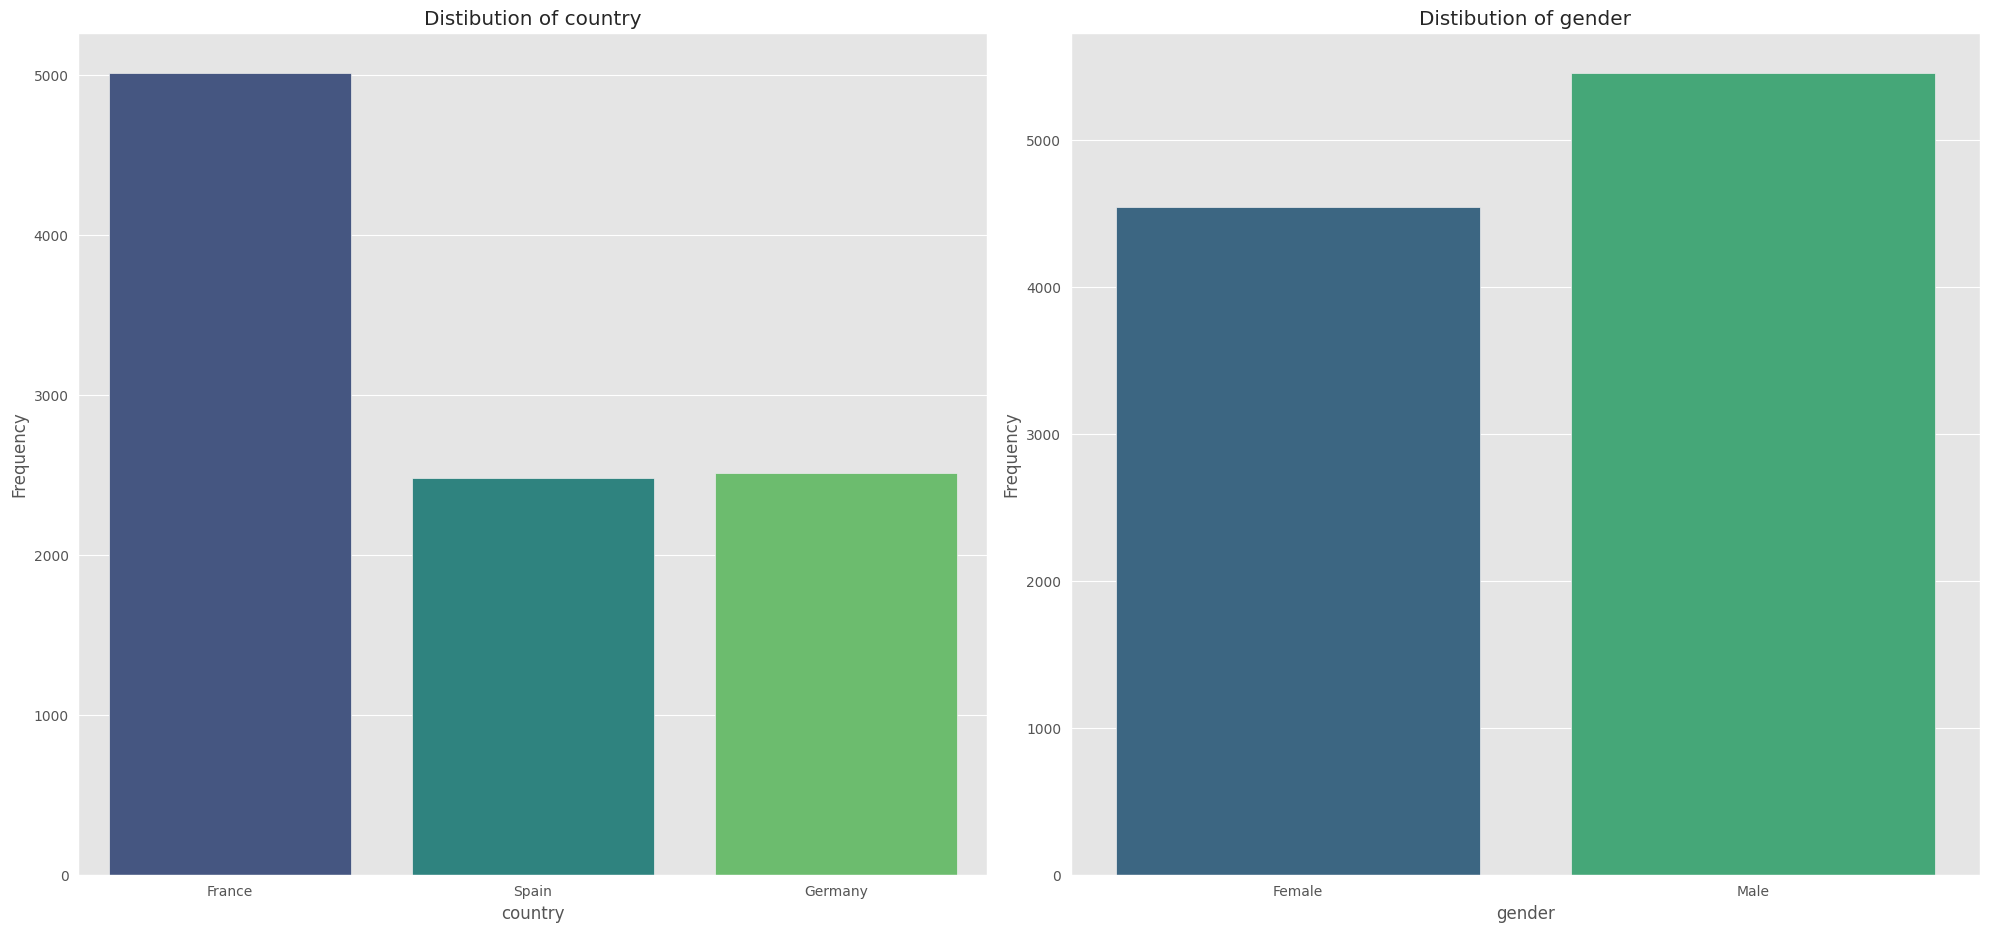

In [15]:
plt.figure(figsize=(20,18))
plt.style.use("ggplot")

for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Distibution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

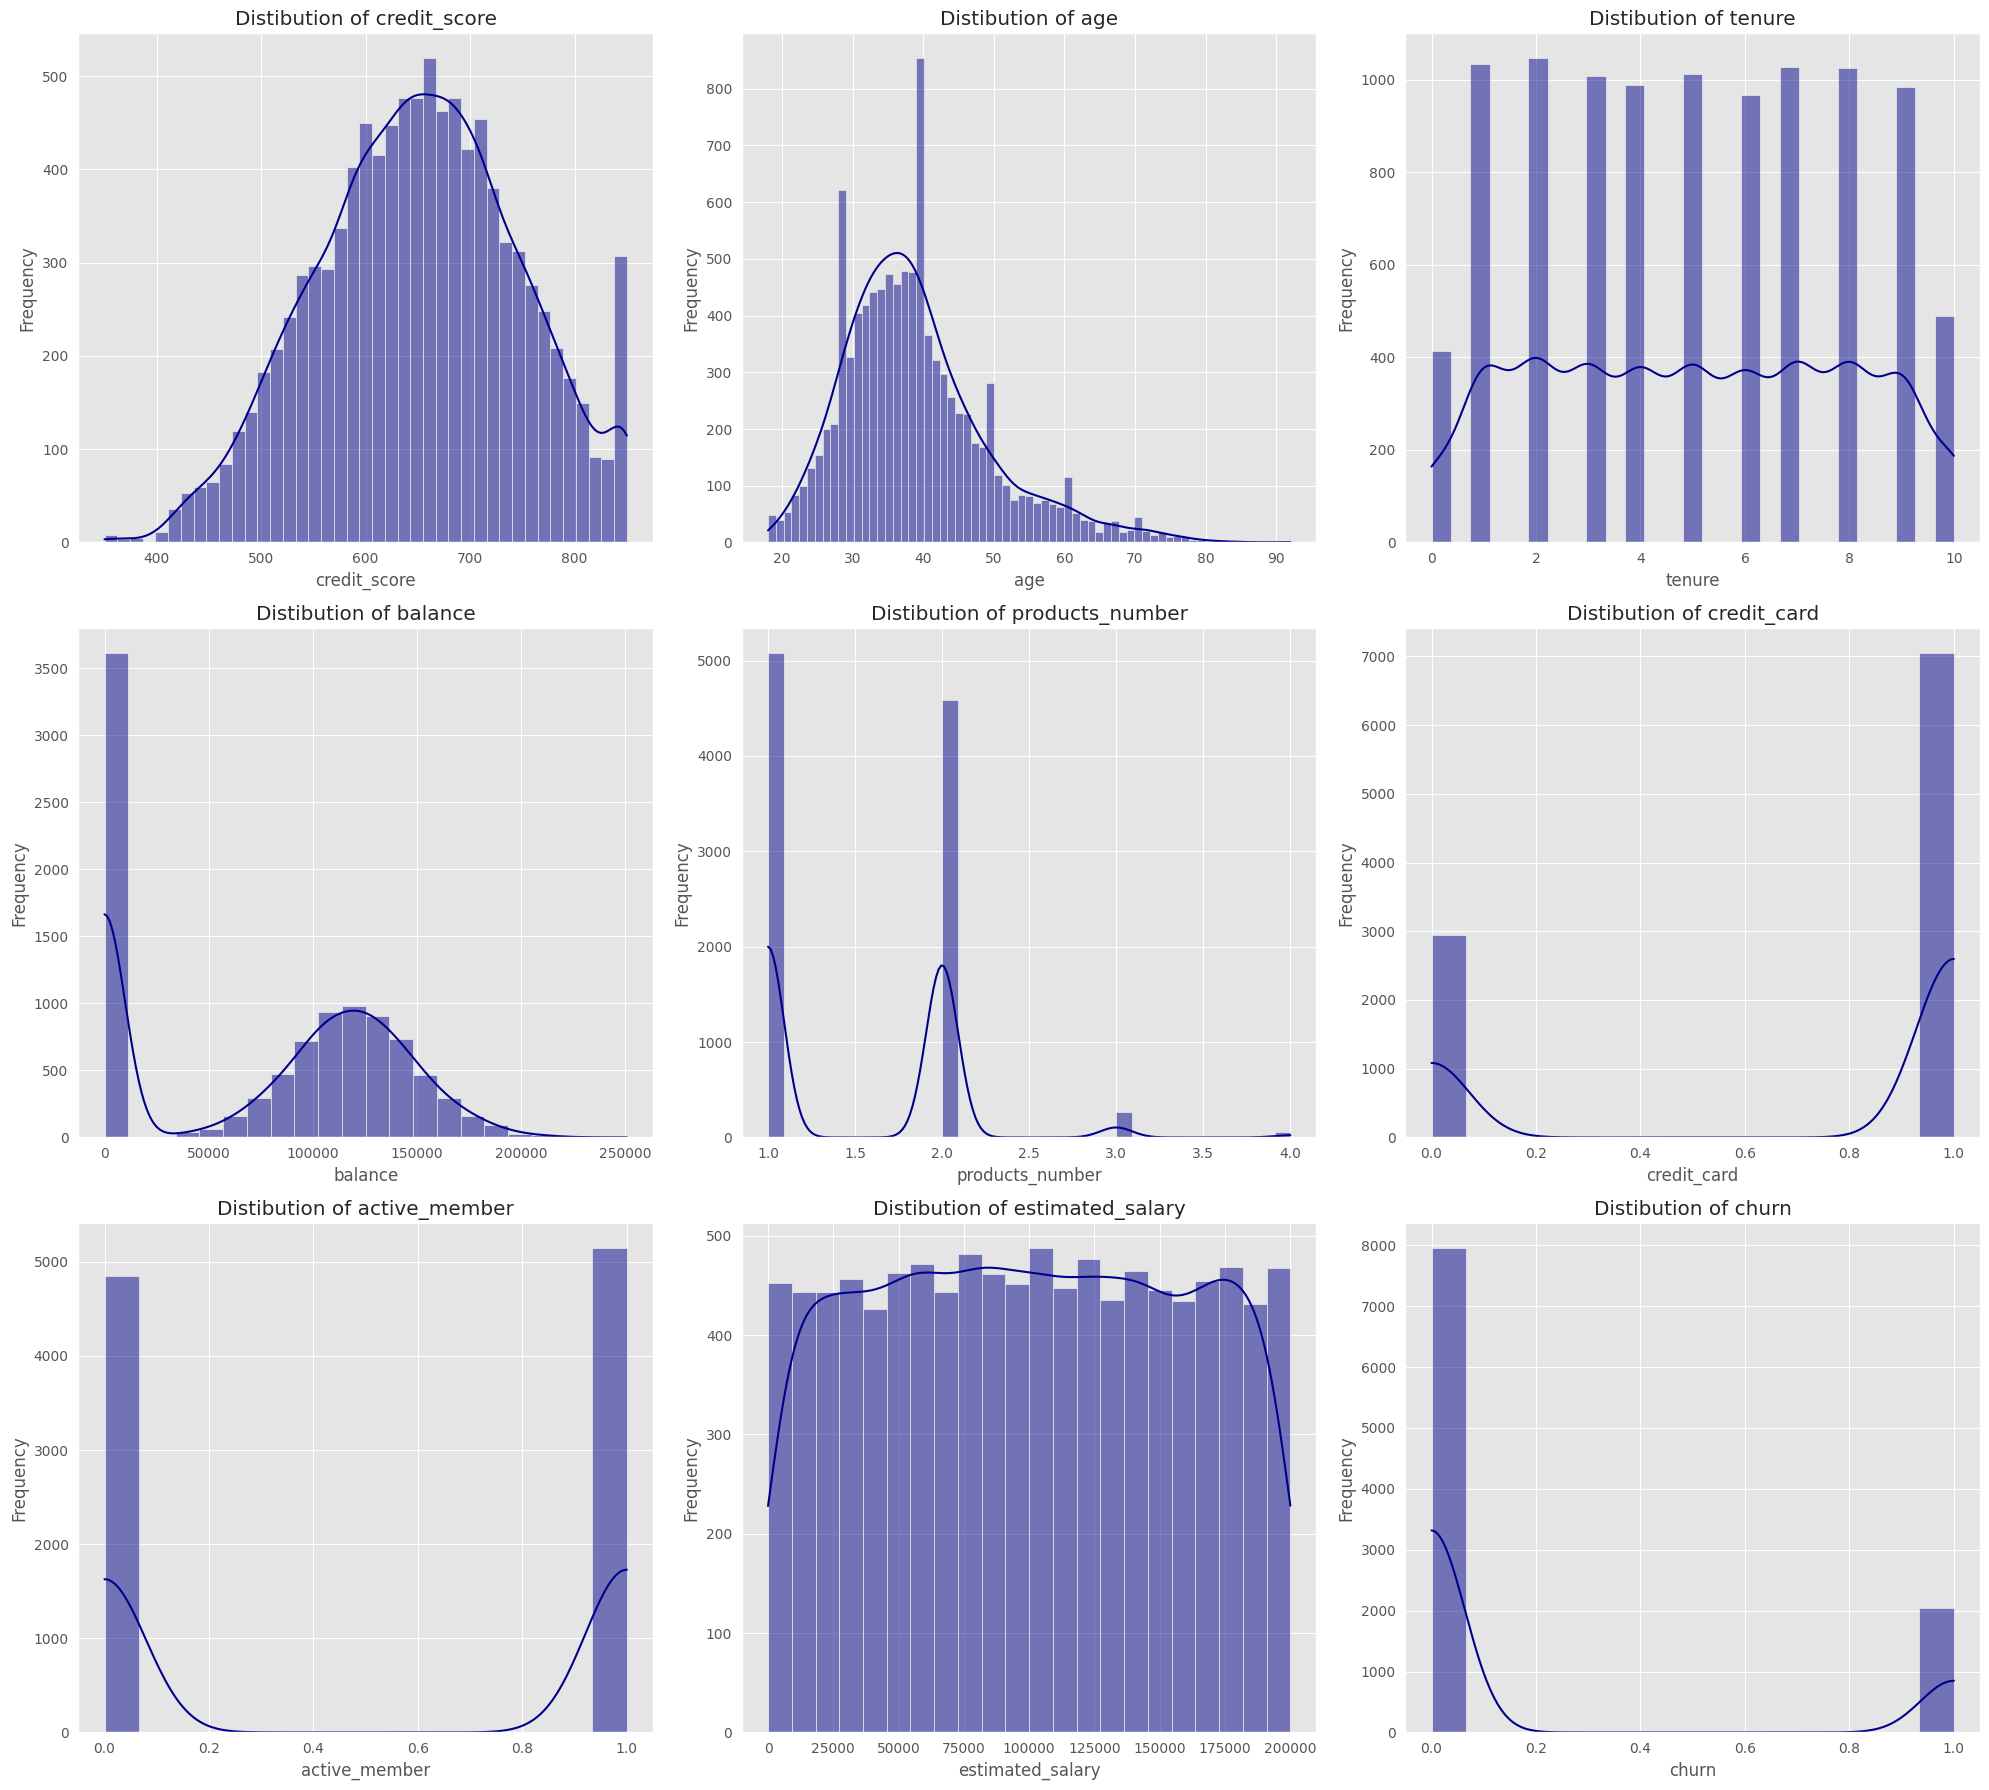

In [16]:
plt.figure(figsize=(20,18))
plt.style.use("ggplot")

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, palette='viridis', color='darkblue')
    plt.title(f"Distibution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

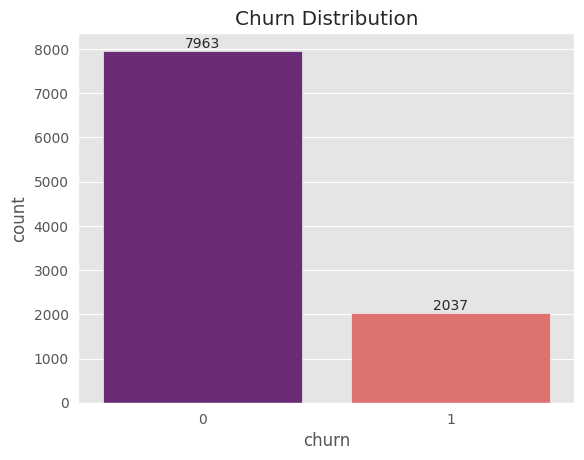

In [17]:
# Count plot for the 'diabetes' variable to verify the distribution
ax = sns.countplot(x='churn', data=df, palette='magma')
plt.style.use('ggplot')
plt.title('Churn Distribution')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

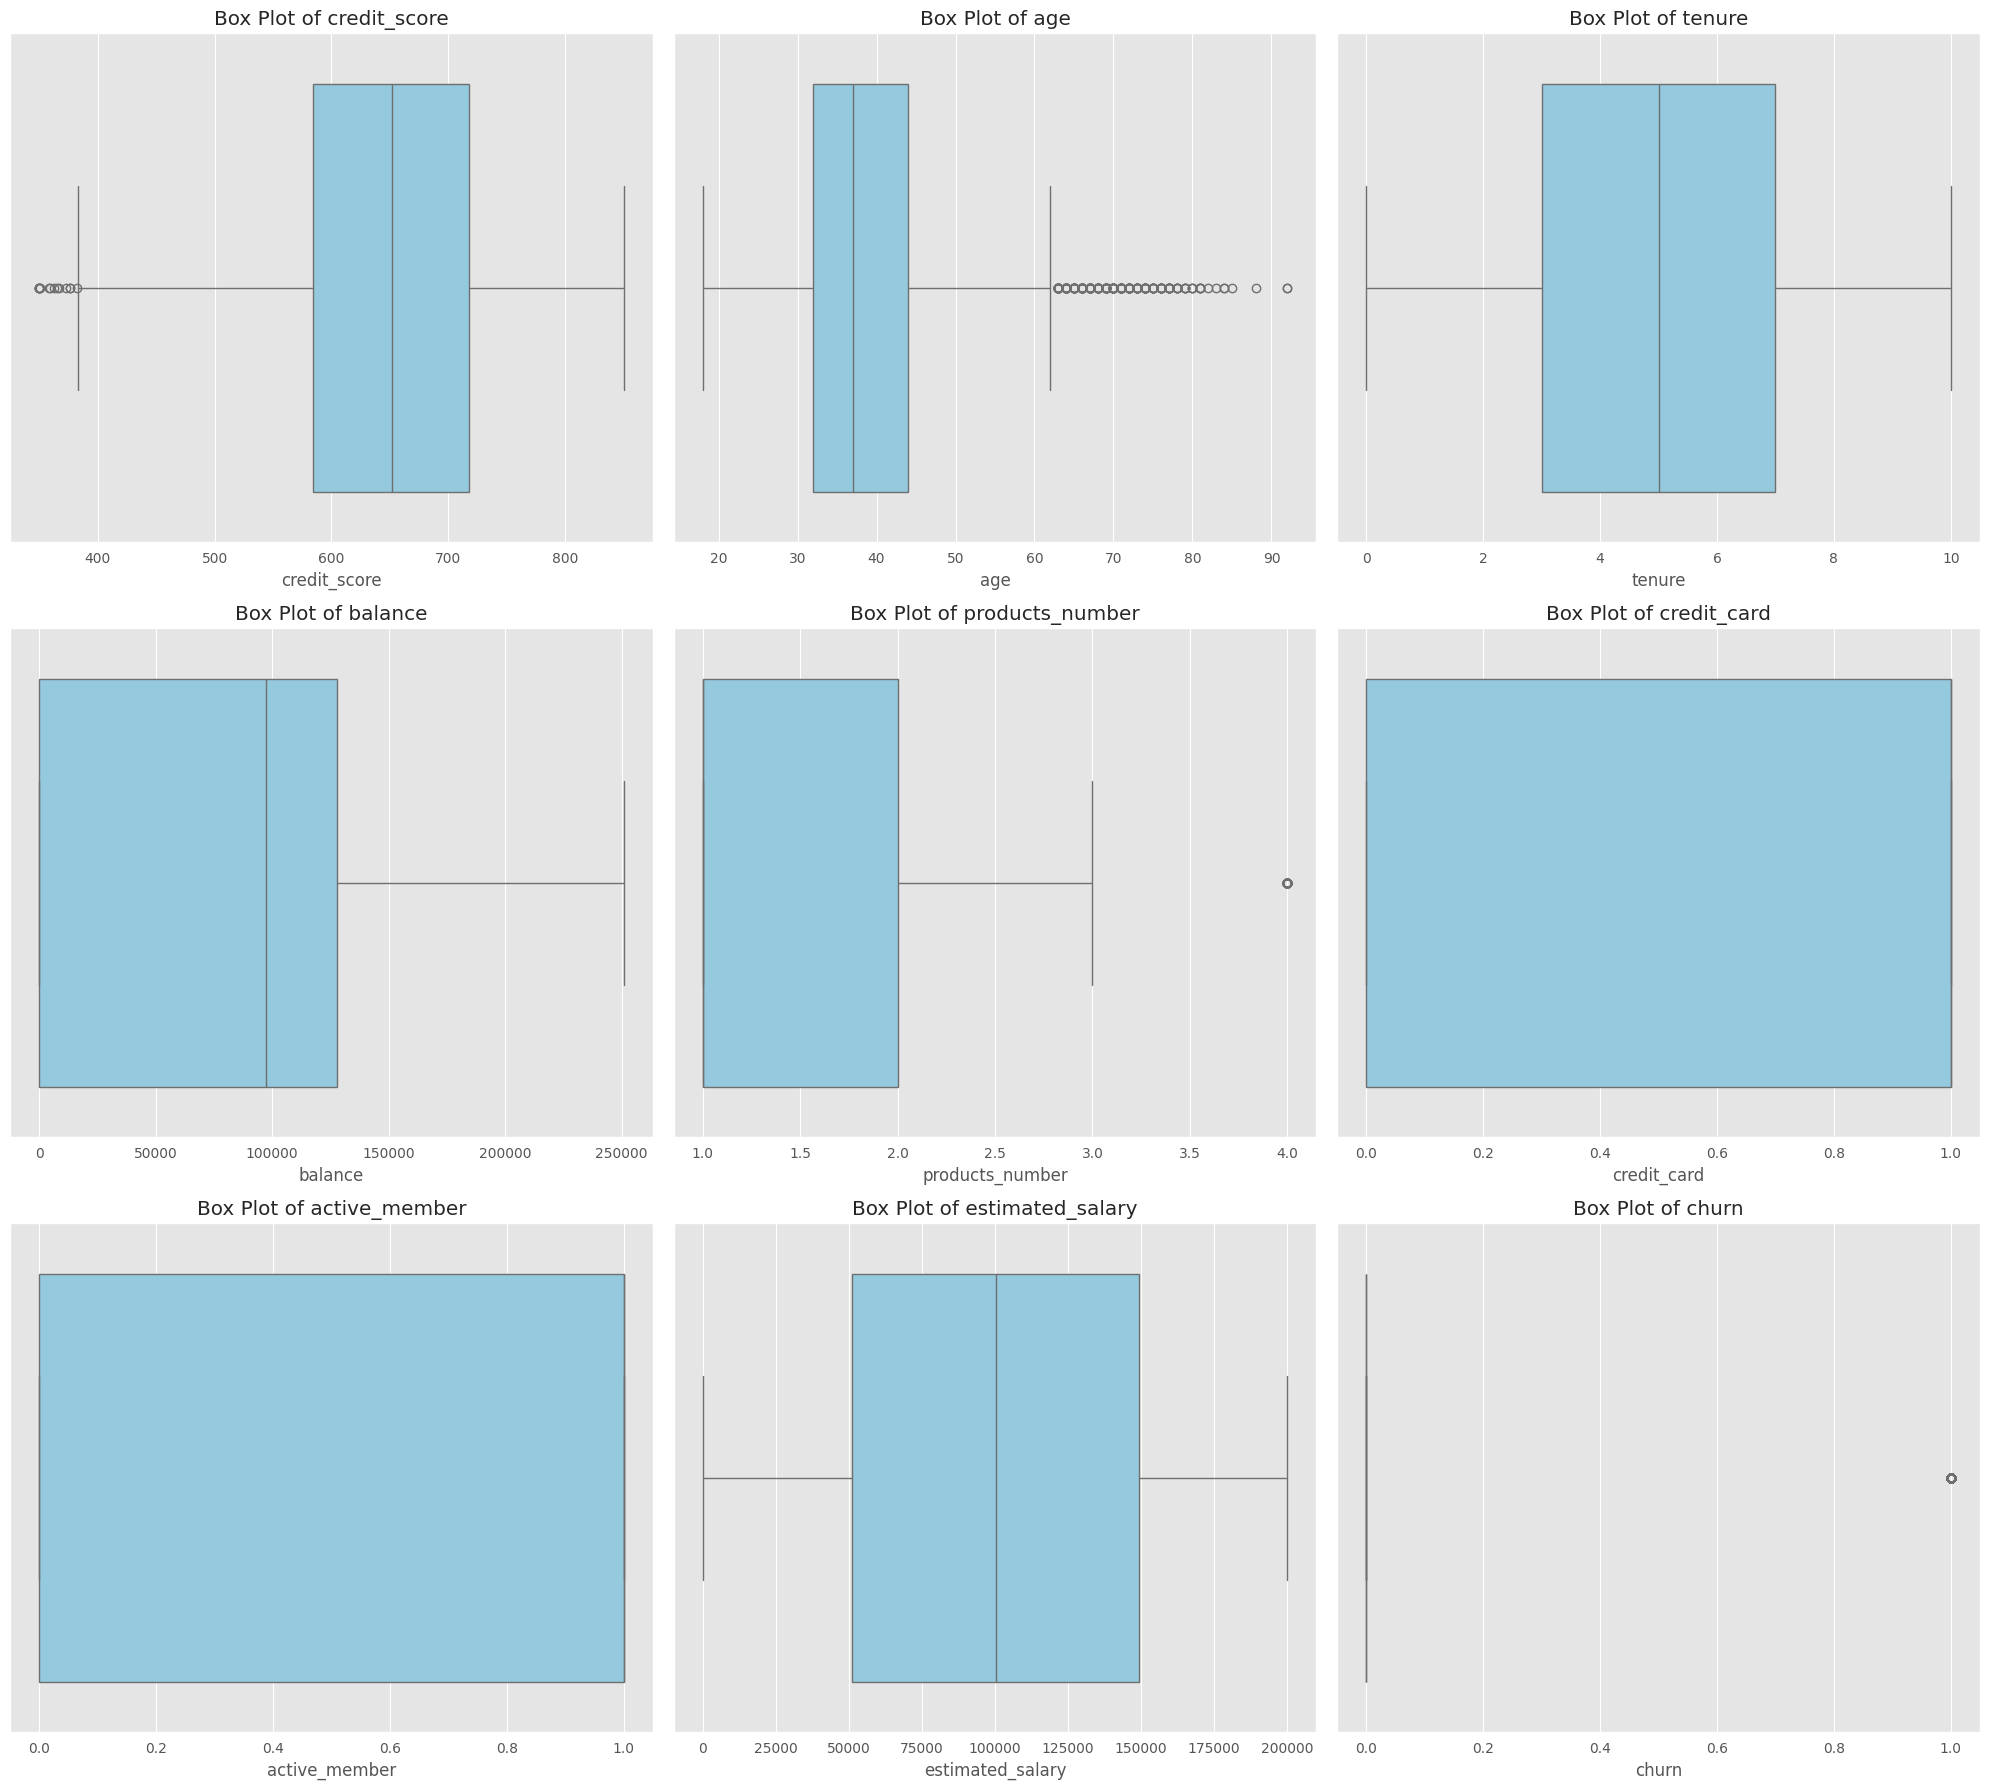

In [18]:
plt.figure(figsize=(20, 18))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

## Bivariate analysis

In [19]:
df.shape

(10000, 12)

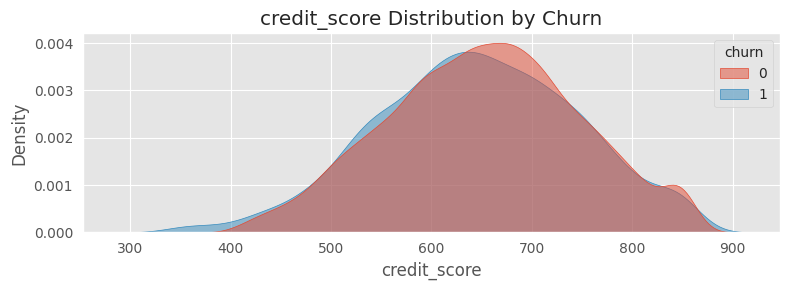

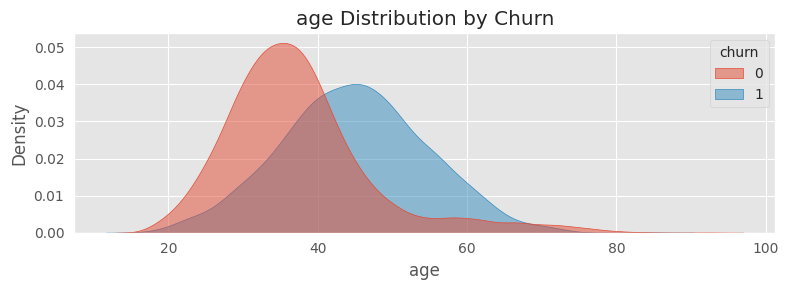

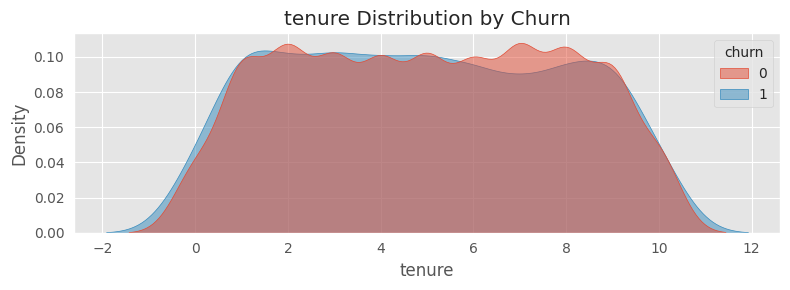

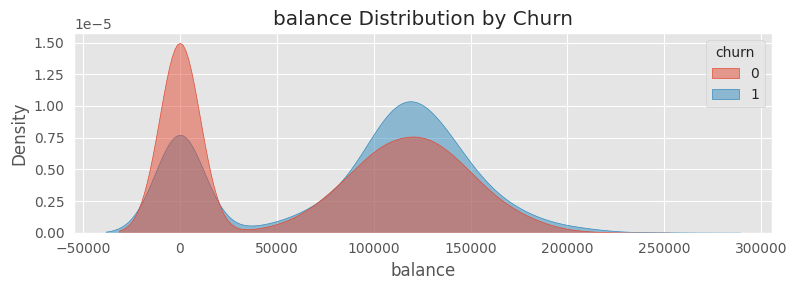

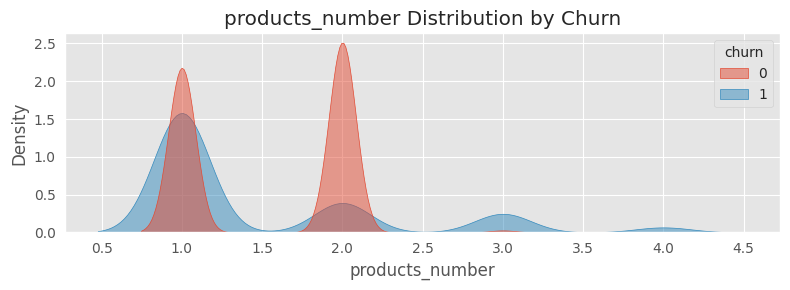

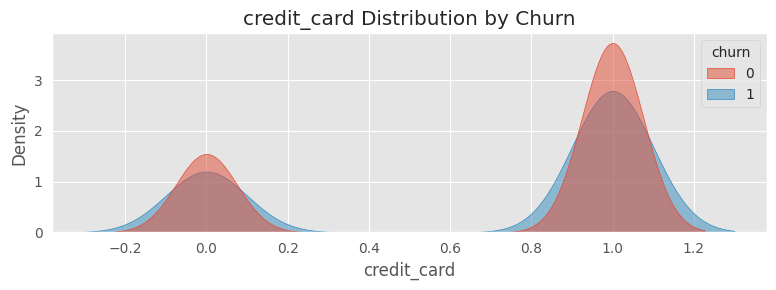

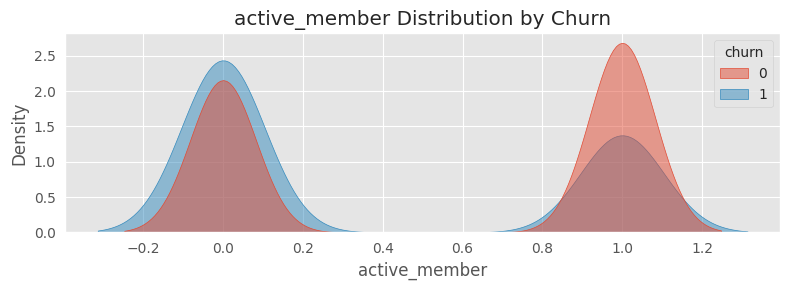

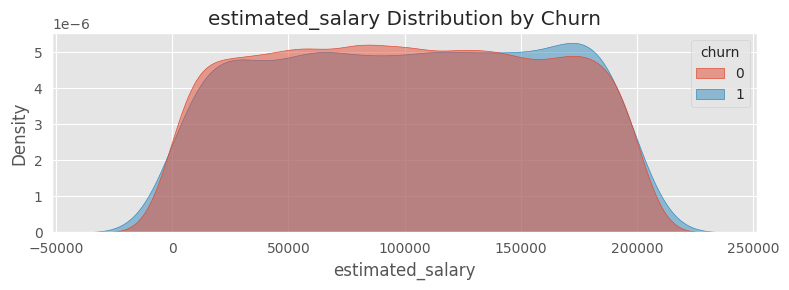

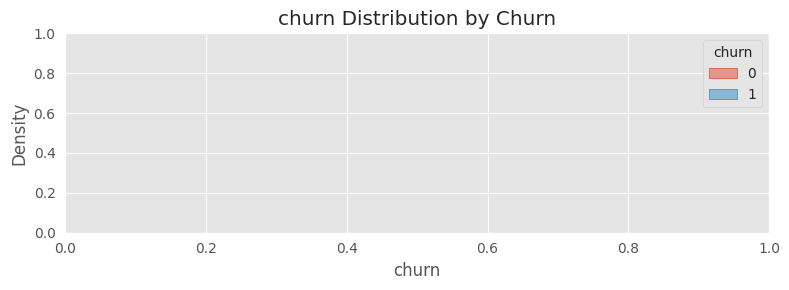

In [20]:
#  Distribution plots for numerical 
for col in numerical_columns:
    plt.figure(figsize=(8,3))
    sns.kdeplot(data=df, x=col, hue='churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'{col} Distribution by Churn')
    plt.tight_layout()
    plt.show()

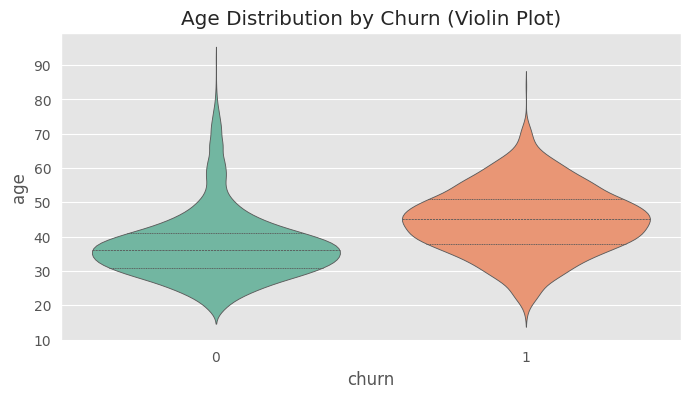

In [21]:
# Violin plot for Age vs churn
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='churn', y='age', inner='quart', palette='Set2')
plt.title('Age Distribution by Churn (Violin Plot)')
plt.show()

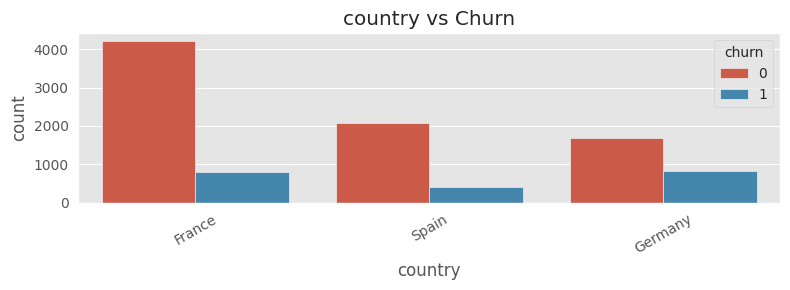

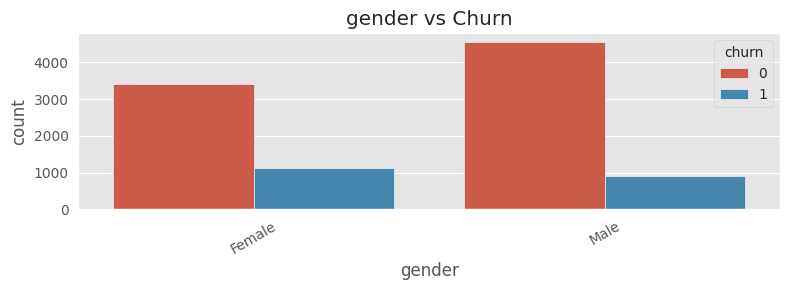

In [22]:
for c in categorical_columns:
    plt.figure(figsize=(8,3))
    sns.countplot(data=df, x=c, hue='churn')
    plt.title(f'{c} vs Churn')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

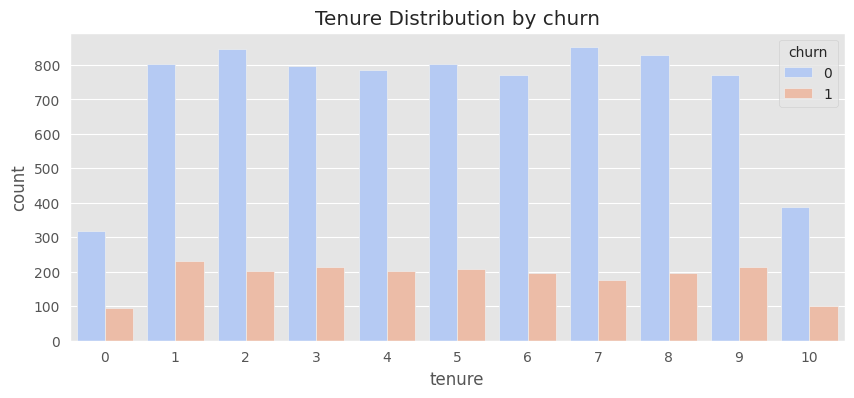

In [23]:
# Tenure distribution
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='tenure', hue='churn', palette='coolwarm')
plt.title('Tenure Distribution by churn')
plt.show()

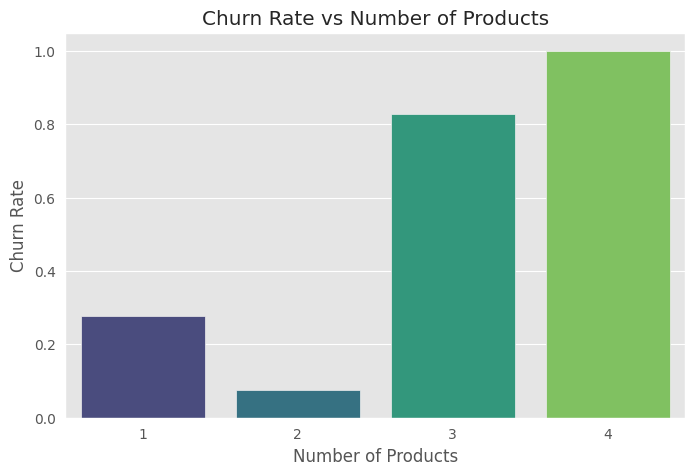

In [24]:
# --- Aggregate churn rate per number of products
churn_rate = df.groupby('products_number')['churn'].mean().reset_index()

# Plot churn rate
plt.figure(figsize=(8,5))
sns.barplot(data=churn_rate, x='products_number', y='churn', palette='viridis')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs Number of Products')
plt.show()

In [25]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

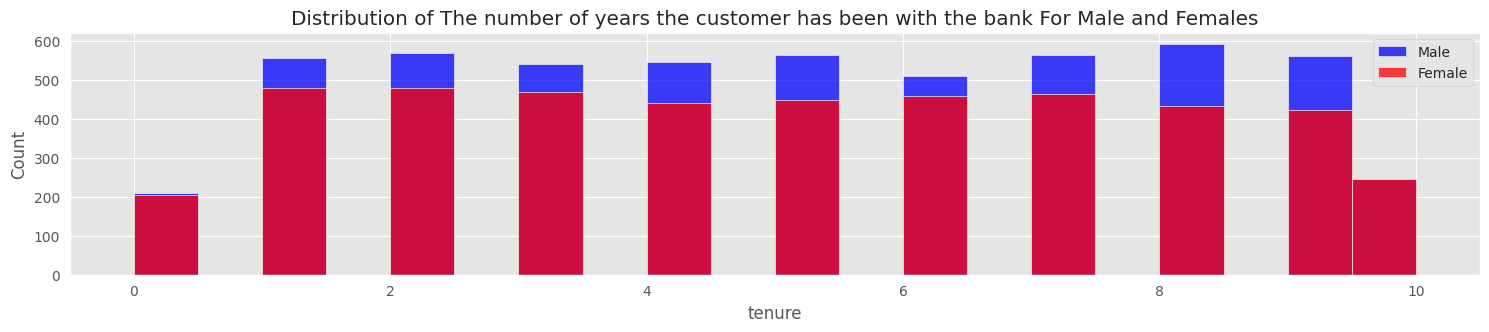

In [26]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of The number of years the customer has been with the bank For Male and Females')

sns.histplot(df[(df['gender'] == 'Male')]['tenure'],color='blue',bins=20,label='Male')
sns.histplot(df[(df['gender'] == 'Female')]['tenure'],color='red',bins=20,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

Most The number of years the Customer has been with the bank is Males

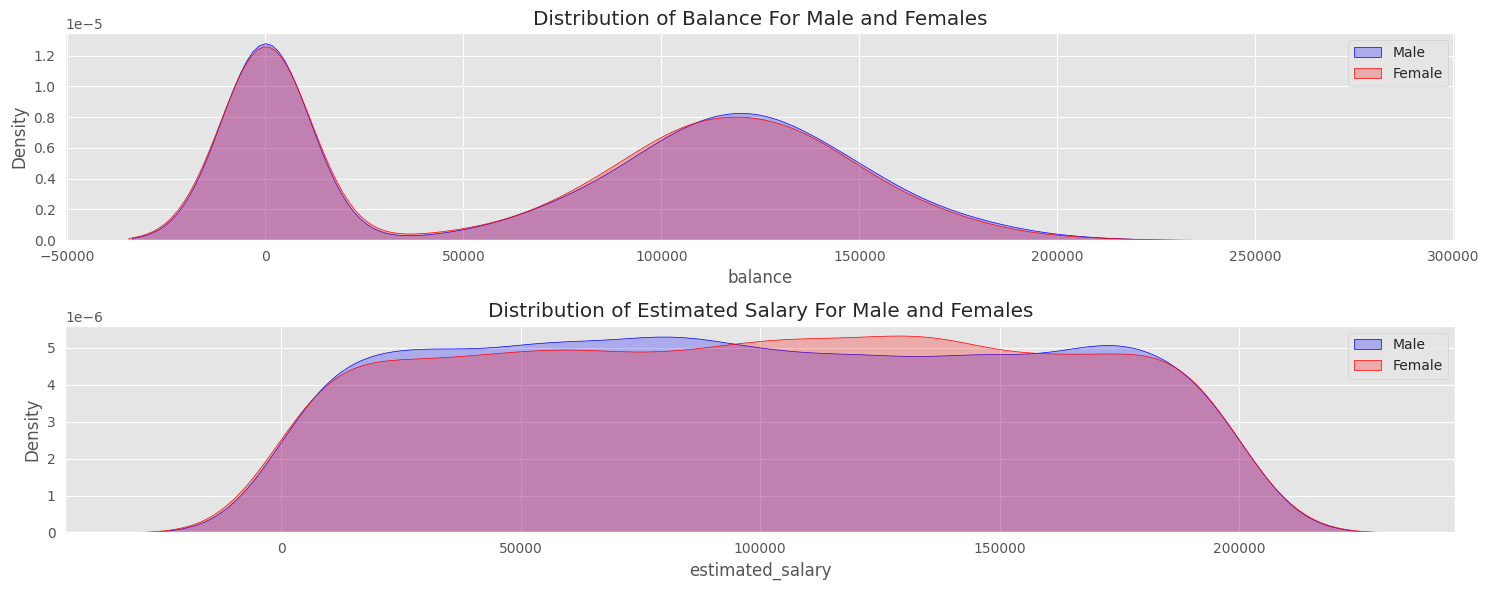

In [27]:
# Balance VS Estimated salary

plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of Balance For Male and Females')

sns.kdeplot(df[(df['gender'] == 'Male')]['balance'],color='blue',fill=True,label='Male')
sns.kdeplot(df[(df['gender'] == 'Female')]['balance'],color='red',fill=True,label='Female')
plt.legend()

plt.subplot(2,1,2)

plt.title('Distribution of Estimated Salary For Male and Females')

sns.kdeplot(df[(df['gender'] == 'Male')]['estimated_salary'],color='blue',fill=True,label='Male')
sns.kdeplot(df[(df['gender'] == 'Female')]['estimated_salary'],color='red',fill=True,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

### Confusion Matrix

In [28]:
numeric_data = df[numerical_columns] 
corr = numeric_data.corr()
print(corr['churn'].sort_values(ascending=False))

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64


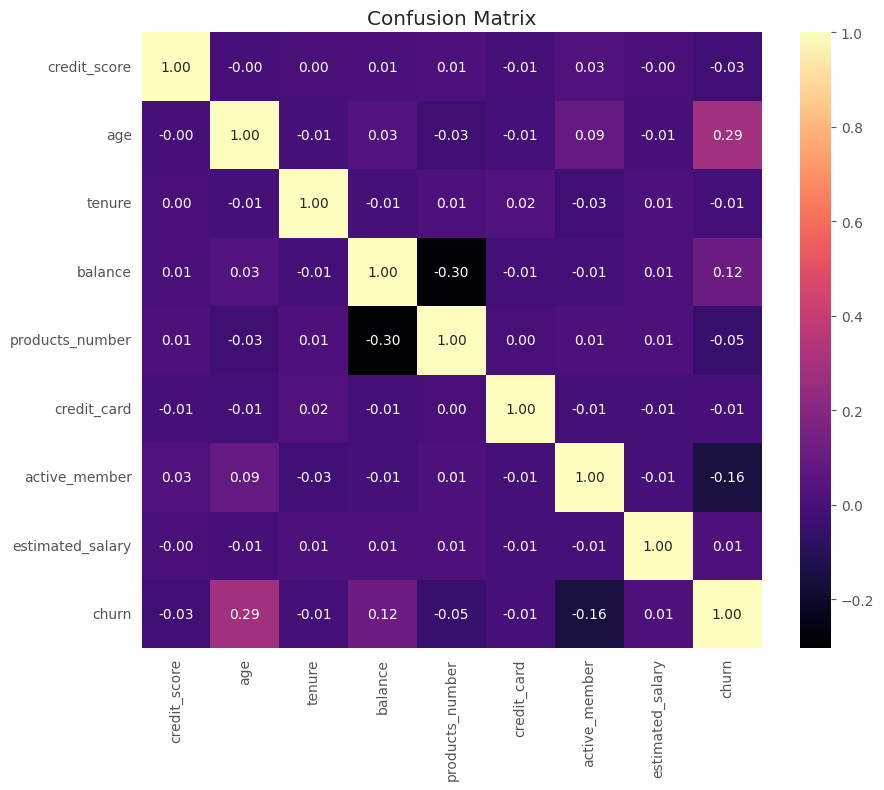

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='magma', annot=True, fmt='.2f')
plt.title("Confusion Matrix")
plt.show()

### Preprocessing - encoding & scaling
We'll build a preprocessing pipeline that encodes categorical features and scales numerical ones.

In [30]:
numerical_columns.remove('churn')

In [31]:
numerical_columns

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary']

## Outlier Treatment

In [32]:

def remove_outliers(df, columns, threshold = 1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    
    return df_clean

df_cleaned = remove_outliers(df, numerical_columns)
print(f"Number of Row : {df_cleaned.shape[0]}\nNumber of Columns : {df_cleaned.shape[1]}")


Number of Row : 9515
Number of Columns : 12


In [33]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [34]:
df_cleaned.shape

(9515, 12)

## Split the data into features and target variable

In [35]:
X = df_cleaned.drop(columns = ['churn'], axis=1)
y= df_cleaned['churn']

In [36]:
X.shape

(9515, 11)

## Train test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (7612, 11) Test shape: (1903, 11)


## Train Multiple models with a pipeline and compare using peformance metrics

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ]
)

In [39]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state = 42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    "GaussioanNB": GaussianNB()

}

results = {}

for name, classifier in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", classifier)])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # Generate the prediction on the testing data
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:,1]


    # Calculate metrics with the predictions
    accuracy = accuracy_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        "Accuracy": accuracy,
        "Recall": recall,
        "precision": precision,
        "F1" : f1,
        "AUC": auc
        
    }

# Convert resuls into a DataFrame
df_results = pd.DataFrame(results).T
# Sort results by recall
sorted_results = df_results.sort_values(by="AUC", ascending=False)
print(sorted_results)

                    Accuracy    Recall  precision        F1       AUC
GradientBoosting    0.860221  0.577128   0.669753  0.620000  0.882003
RandomForest        0.849185  0.566489   0.632047  0.597475  0.878253
LightGBM            0.868628  0.566489   0.710000  0.630178  0.877977
CatBoost            0.859170  0.521277   0.690141  0.593939  0.874986
AdaBoost            0.833421  0.728723   0.560327  0.633526  0.873149
SVC                 0.807147  0.763298   0.507965  0.609989  0.865151
XGBoost             0.861272  0.537234   0.691781  0.604790  0.850003
LogisticRegression  0.747767  0.779255   0.424638  0.549719  0.836063
GaussioanNB         0.753547  0.765957   0.430493  0.551196  0.823562
DecisionTree        0.773516  0.526596   0.439024  0.478839  0.680456


In [40]:
best_model = models["GradientBoosting"]
best_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", best_model)               
])

## Validate the Pipeline for Gradient Boosting

In [41]:
best_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['country', 'gender'], dtype='object'))])),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])

In [42]:
import joblib
joblib.dump(best_pipeline, "best_gd_base_pipeline.joblib")
print("Best GradientBoosting base model saved successfully!")

Best GradientBoosting base model saved successfully!


In [43]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__min_samples_leaf': [1, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(best_pipeline, param_grid, cv=cv, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best Score: 0.4661825772709928


In [44]:
best_gd_tuned_model = grid_search.best_estimator_
best_gd_tuned_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['country', 'gender'], dtype='object'))])),
                ('classifier',
                 GradientBoostingClassifier(min_samples_leaf=5,
                                            n_estimators=300, random_state=42,
                                            subsample=0.8))])

## Save the best Model

In [45]:
import joblib
joblib.dump(best_gd_tuned_model, "best_gd_tuned_pipeline.joblib")
print("Best GradientBoosting tuned model saved successfully!")

Best GradientBoosting tuned model saved successfully!


## Load the tuned model

In [46]:
loaded_model = joblib.load("best_gd_tuned_pipeline.joblib")

## Evaluation Metrics

In [47]:
# Predictions
y_pred_gd = loaded_model.predict(X_test)
y_proba_gd = loaded_model.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred_gd)
prec = precision_score(y_test, y_pred_gd)
rec = recall_score(y_test, y_pred_gd)
f1 = f1_score(y_test, y_pred_gd)
roc = roc_auc_score(y_test, y_proba_gd)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test ROC AUC: {roc:.4f}")

Test Accuracy: 0.8634
Test Precision: 0.7636
Test Recall: 0.4468
Test F1-score: 0.5638
Test ROC AUC: 0.8792


## Feature importance (if applicable)

num__age                 0.372704
num__products_number     0.212563
num__tenure              0.127232
cat__country_Germany     0.091288
num__balance             0.050573
num__active_member       0.034865
cat__gender_Male         0.033579
cat__gender_Female       0.029017
cat__country_Spain       0.017540
cat__country_France      0.012139
num__estimated_salary    0.010454
num__credit_score        0.007746
num__credit_card         0.000300
dtype: float64

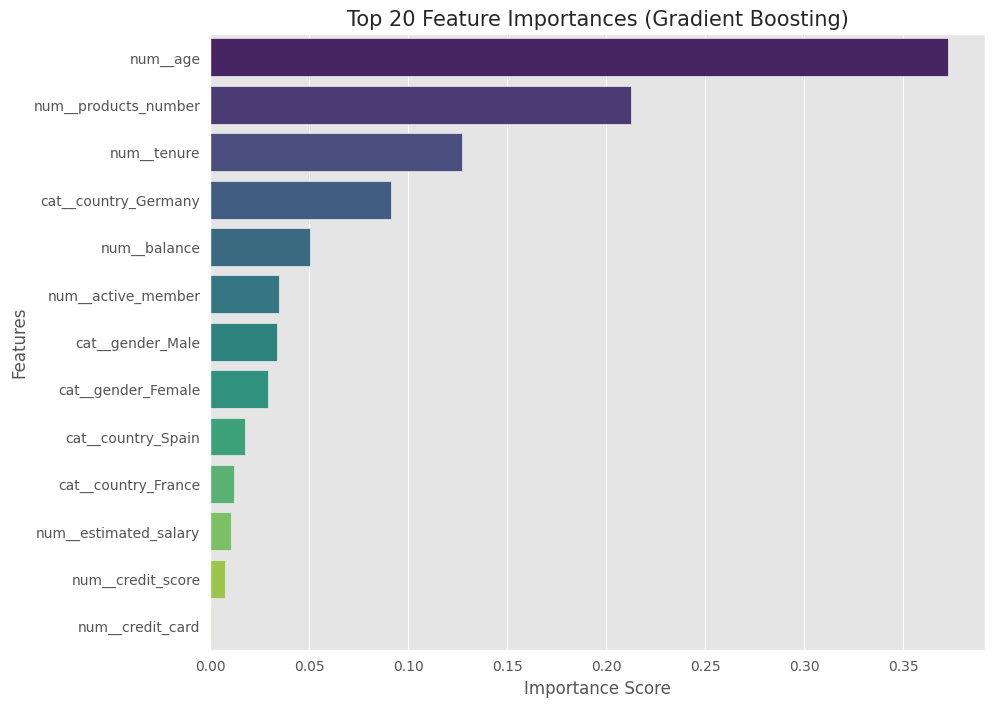

In [48]:
# 1. Access the trained Gradient Boosting model from the pipeline
gb_model = best_pipeline.named_steps['classifier']

# 2. Extract feature names from the fitted preprocessor
feature_names = best_pipeline.named_steps['preprocessor'].get_feature_names_out()

# 3. Create a Series and sort it to see the most important features first
importances = best_pipeline.named_steps['classifier'].feature_importances_
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
display(feature_importance)

# 4. Generate the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')

# 5. Add informative labels and title
plt.title('Top 20 Feature Importances (Gradient Boosting)', fontsize=15)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

Gradient Boosting model without hyperpamaater tunning demonstrates the best comprehensive performance across the board.
Highest AUC (0.882): This indicates it has the strongest general ability to distinguish between churners and non-churners better than any other model in the list. Also it has accuracy of 86%


## Load the model for Prediction

In [49]:
gd_base_pipeline = joblib.load("best_gd_base_pipeline.joblib")
y_pred_gd = gd_base_pipeline.predict(X_test)
y_pred_gd_proba = gd_base_pipeline.predict_proba(X_test)[:,1]

In [50]:
cl = classification_report(y_test, y_pred_gd)
print("\nClassification Report:")
print(cl)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1527
           1       0.67      0.58      0.62       376

    accuracy                           0.86      1903
   macro avg       0.78      0.75      0.77      1903
weighted avg       0.85      0.86      0.86      1903



## Confusion Matrix

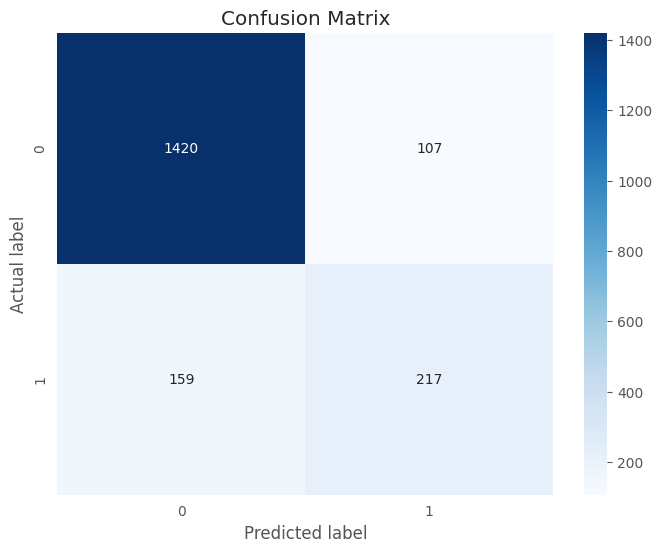

In [51]:
cm = confusion_matrix(y_test, y_pred_gd)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix")
plt.show()

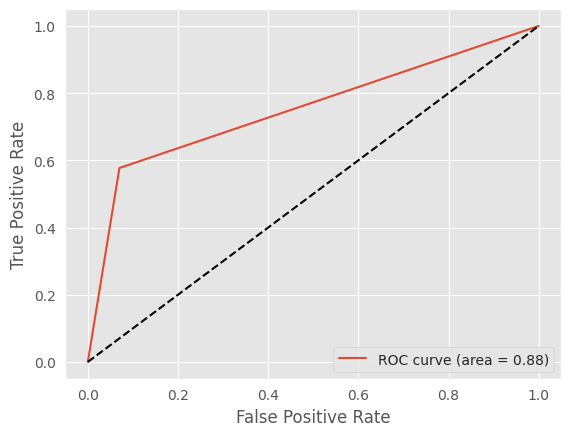

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_score = roc_auc_score(y_test, y_pred_gd_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gd)

# Plotting ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Prediction System

In [53]:
def make_churn_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    prediction = gd_base_pipeline.predict(input_df)[0]
    probability = gd_base_pipeline.predict_proba(input_df)[0, 1]
    churn_status =  "Churn" if prediction == 1 else "No Churn"
    return churn_status, probability

In [54]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [55]:
## User input
input_df = {
    'credit_score': 560,
    'country': 'Germany',
    'gender': 'Male',
    'age': 55,
    'tenure': 2,
    'balance': 25000,
    'products_number': 1,
    'credit_card': 1,
    'active_member': 0,
    'estimated_salary':24000
}

In [56]:
## Prediction
prediction, probability = make_churn_prediction(input_df)
print(f"Churn Prediction: {prediction}")
print(f"Probability: {probability}")

Churn Prediction: Churn
Probability: 0.928782056385097
